In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib

**Data Exploring**

In [2]:
# Reading data
df=pd.read_csv("wfp_food_prices_ind.csv")
df.head(5)

/var/folders/8v/cmf3zm1j19q729mqzcz63d480000gn/T/ipykernel_3645/1684059139.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("wfp_food_prices_ind.csv")


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167


In [3]:
# Rename a few columns 
df=df.rename(columns={'admin1':'State','admin2':'City'})
df.head(5)

,date,State,City,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167


In [6]:
df['City'].unique()

array(['#adm2+name', 'Delhi', 'Ahmadabad', 'Shimla', 'Bangalore Urban',
       'Bhopal', 'Mumbai city', 'Khordha', 'Hyderabad', 'West Tripura',
       'Kolkata', 'East Khasi Hills', 'Bikaner', 'Chennai', 'Kamrup',
       'Thiruvananthapuram', 'Lucknow', 'Aizawl', 'Patna', 'Chandigarh',
       'Ranchi', 'Amravati', 'Kohima', 'Amritsar', 'Ludhiana',
       'Dehra Dun', 'Krishna', 'Rajkot', 'Dindigul', 'Kanpur', 'Banka',
       'Hisar', 'Karnal', 'Mandi', 'Dharwad', 'Bid', 'Cuttack',
       'Sambalpur', 'Tiruchchirappalli', 'Agra', 'Varanasi', 'Darjiling',
       'Indore', 'Dimapur', 'Bathinda', 'Jodhpur', 'Ernakulam', 'Kota',
       'Andaman Islands', 'Puducherry', 'North Goa', 'Gurgaon',
       'Panchkula', 'Kozhikode', 'Gwalior', 'Jabalpur', 'Sundargarh', nan,
       'Chittoor', 'Kurnool', 'Vishakhapatnam', 'Darbhanga', 'Gaya',
       'Muzaffarpur', 'Purnia', 'Bastar', 'Bilaspur', 'Durg', 'Surguja',
       'Kachchh', 'Surat', 'Kangra', 'Solan', 'Dakshin Kannad', 'Mysore',
       'Palak

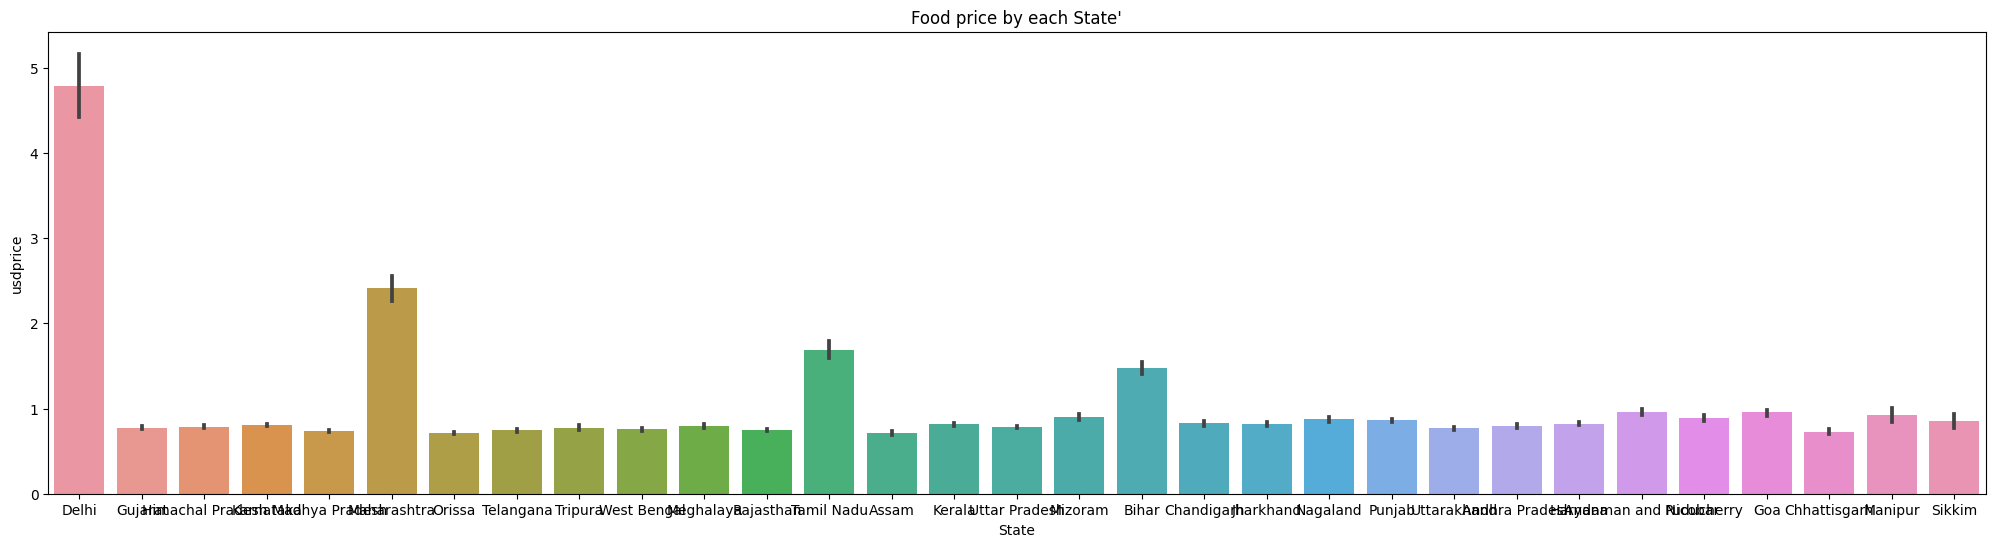

In [28]:
plt.figure(figsize=(25, 6))
sns.barplot(data=df, x='State', y='usdprice')
plt.title("Food price by each State'")
plt.show()

**Preprocessing Data**

In [29]:
df.isna().sum()

date           0
State        672
City         672
market         0
latitude     672
longitude    672
category       0
commodity      0
unit           0
priceflag      0
pricetype      0
currency       0
price          0
usdprice       0
dtype: int64

In [30]:
df.isna().sum()

date           0
State        672
City         672
market         0
latitude     672
longitude    672
category       0
commodity      0
unit           0
priceflag      0
pricetype      0
currency       0
price          0
usdprice       0
dtype: int64

In [31]:
df.isnull().sum()

date           0
State        672
City         672
market         0
latitude     672
longitude    672
category       0
commodity      0
unit           0
priceflag      0
pricetype      0
currency       0
price          0
usdprice       0
dtype: int64

In [32]:
df=df.dropna(subset=['State'])

In [33]:
df.isnull().sum()

date         0
State        0
City         0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

**Decision Tree Model**

In [36]:
df=df[['City', 'category', 'unit', 'usdprice']]
dfflask=df[['City','category','unit']]
dfflask.to_csv('df_final.csv')
df.head(5)

,City,category,unit,usdprice
0,Delhi,cereals and tubers,KG,0.2550
1,Delhi,cereals and tubers,KG,0.1594
2,Delhi,oil and fats,KG,0.9880
3,Ahmadabad,cereals and tubers,KG,0.2167
4,Ahmadabad,cereals and tubers,KG,0.1976


In [39]:
Xflask=df[['City', 'category','unit']]
yflask=df['usdprice']
Xflask_train, Xflask_test, yflask_train, yflask_test = train_test_split(Xflask, yflask, test_size=0.2, random_state=42)

In [ ]:
# Defining variables dependents and independents
X = pd.get_dummies(df[['City', 'category','unit']], drop_first=True)
y = df['usdprice']
X.head(5)


,City_Agra,City_Ahmadabad,City_Aizawl,City_Ajmer,City_Aligarh,City_Amravati,City_Amritsar,City_Andaman Islands,City_Araria,City_Baleshwar,...,City_West Imphal,City_West Midnapore,City_West Tripura,category_milk and dairy,category_miscellaneous food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits,unit_KG,unit_L
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape[1]

164

In [ ]:
model_Food = DecisionTreeRegressor(random_state=42)
model_Food.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model_Food.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'r2: {r2}')

Mean Squared Error: 1.5355891483752426
r2: 0.8554783343234253


In [ ]:
X_test['usdprice_pred']=y_pred
X_test['usdprice_real']=y_test
X_test.head(5)

,City_Agra,City_Ahmadabad,City_Aizawl,City_Ajmer,City_Aligarh,City_Amravati,City_Amritsar,City_Andaman Islands,City_Araria,City_Baleshwar,...,City_West Tripura,category_milk and dairy,category_miscellaneous food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits,unit_KG,unit_L,usdprice_pred,usdprice_real
58130,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.758821,2.8049
160822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1.251709,1.2561
213129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1.454539,0.0000
152502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.212154,0.3409
174748,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1.272548,0.0000


In [53]:
Xflask_test['usdprice_real']=y_test
Xflask_test['usdprice_pred']=y_pred
filtercity=Xflask_test[Xflask_test['City']=='Chittoor']
print(filtercity)

            City               category unit  usdprice_real  usdprice_pred
182054  Chittoor        pulses and nuts   KG         0.0000       0.928751
136044  Chittoor         milk and dairy    L         0.5759       0.453025
125537  Chittoor           oil and fats   KG         2.8121       1.249276
194366  Chittoor  vegetables and fruits   KG         0.0000       0.214192
164924  Chittoor     miscellaneous food   KG         0.5480       0.785774
...          ...                    ...  ...            ...            ...
164922  Chittoor         milk and dairy    L         0.5607       0.453025
87065   Chittoor           oil and fats   KG         1.2415       1.249276
176659  Chittoor           oil and fats   KG         0.0000       1.249276
110002  Chittoor        pulses and nuts   KG         1.4256       0.928751
184096  Chittoor           oil and fats   KG         0.0000       1.249276

[165 rows x 5 columns]


In [ ]:
joblib.dump(model_Food, 'food_prediction.joblib')

['food_prediction.joblib']